## Lista 2: Gabarito

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problema 1 (a)

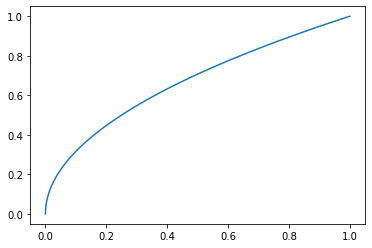

In [2]:
x = np.linspace(0, 1, 1000) #1000 evenly spaced samples in (0, 1).
y = np.sqrt(x)

plt.plot(x, y) #Blue is the default plotting color, so no other arguments need to be passed.

### Problema 1 (b)

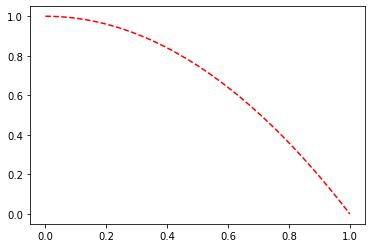

In [3]:
x = np.linspace(0, 1, 1000)

y = 1 - (x ** 2)

plt.plot(x, y, 'r--')

Estamos interessados em plotar um subconjunto finito da seguinte classe de mapas $S$-unimodais:

$$\mathcal{C} = \{u: [0, 1] \to [0, 1]; u(x) = 1 - \mu x^{2}, \mu \in (0, 2]\},$$

para 10 valores igualmente espaçados de $\mu$, entre $0.1$ e $1$.

In [4]:
plt.rcParams["figure.dpi"] = 200 #dpi = dots per inch

In [5]:
np.arange(0, 1, 1000)

array([0])

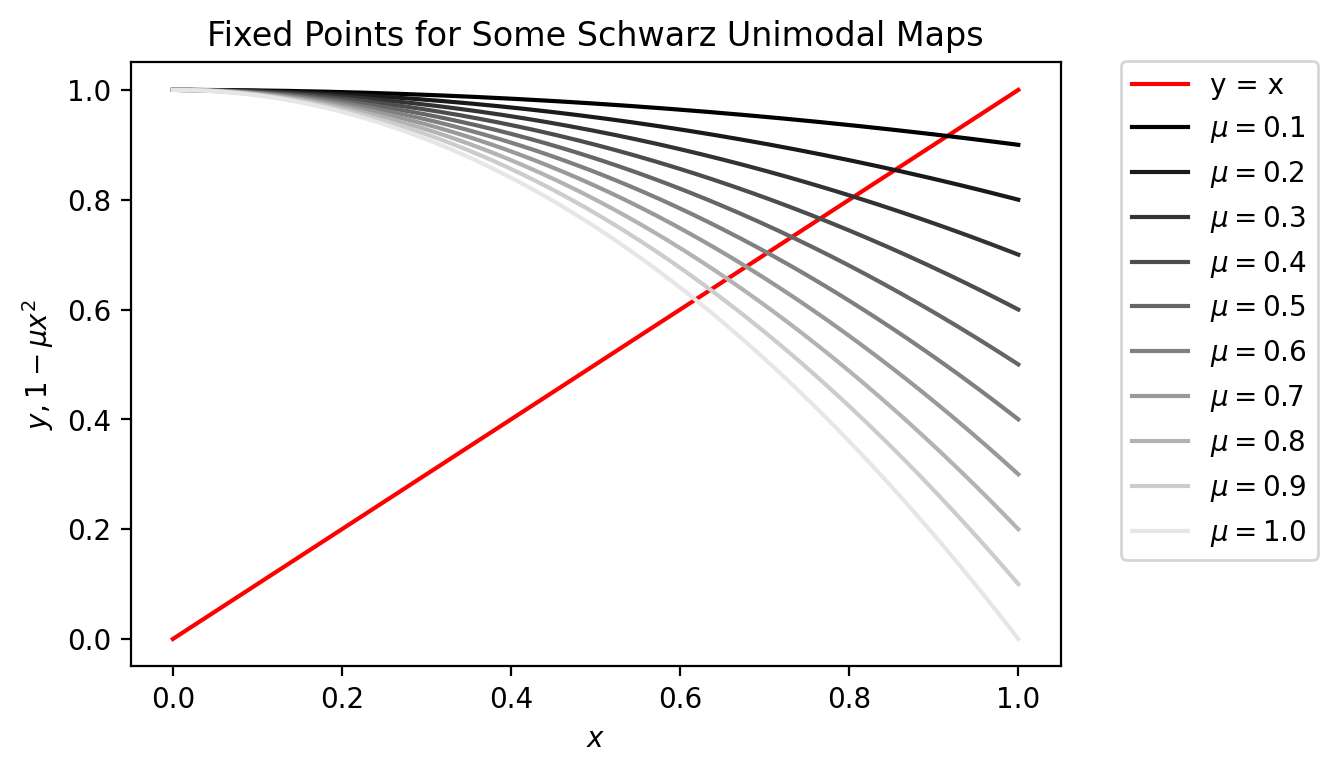

In [6]:
x = np.linspace(0, 1, 1000) #Cria uma malha que vai do 0 ao 1 com 1000 pontos lá dentro

mu_range = np.arange(0.1, 1.1, 0.1) #Vai do 0.1 ao 1.1 (exclusive) de 0.1 em 0.1

color_range = np.arange(0, 1, 0.1) #Quanto maior, menos opaco.

fig, ax = plt.subplots() #Cria uma figura com um único par de eixos ordenados.

ax.plot(x, x, 'r', label="y = x") #Plota a identidade.

for mu, color in zip(mu_range, color_range):
    line, = ax.plot(x, 1 - mu * (x ** 2), color=f"{color}", label=f"$\mu = {round(mu, 2)}$")

ax.set_xlabel('$x$')
ax.set_ylabel('$y, 1 - \mu x^{2}$')
ax.set_title("Fixed Points for Some Schwarz Unimodal Maps")
plt.legend(bbox_to_anchor=(1.05, 1.026), loc='upper left')

plt.show()

### Problema 1 (d)

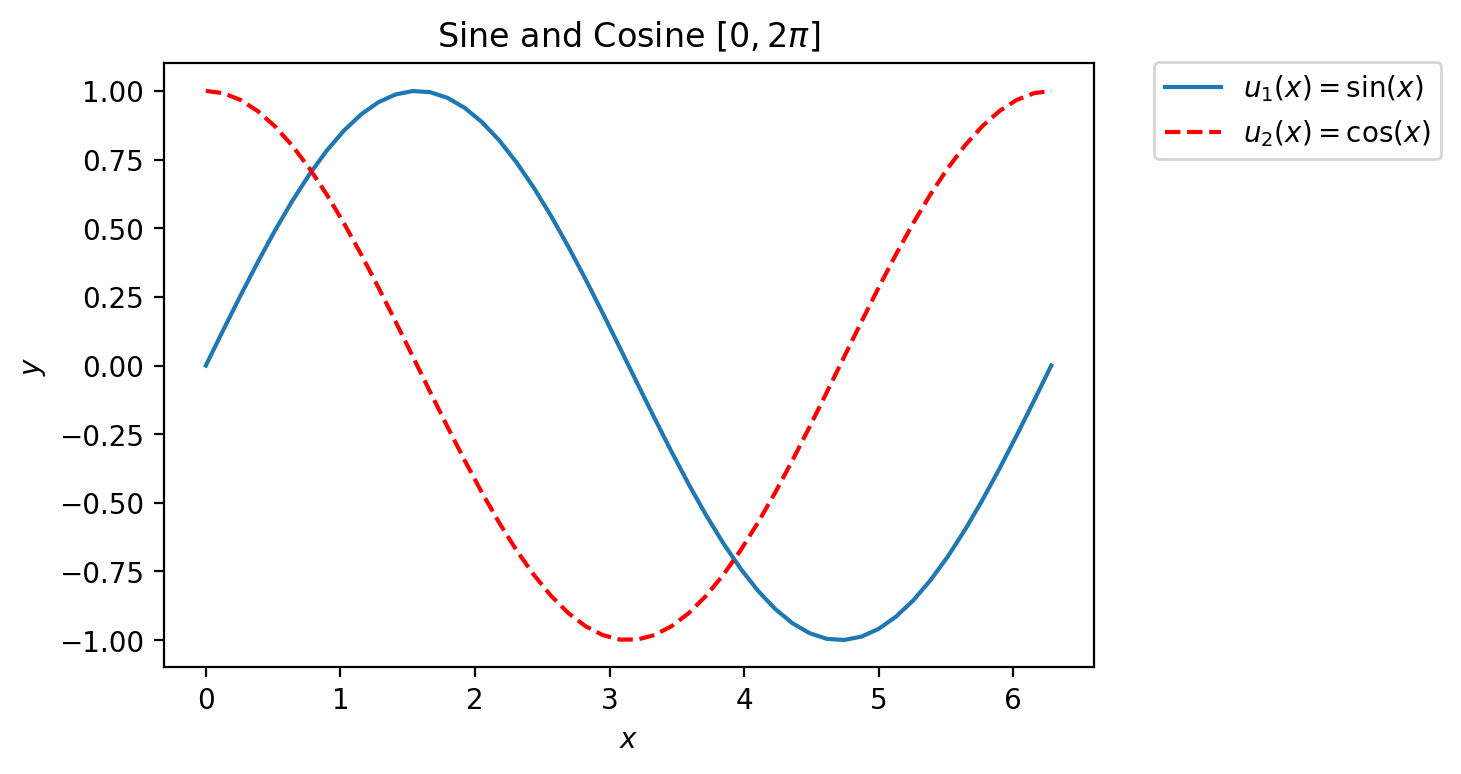

In [7]:
x = np.linspace(0, 2 * np.pi)

y1, y2 = np.sin(x), np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y1, label="$u_1(x) = \sin (x)$")
ax.plot(x, y2, 'r--', label="$u_2(x) = \cos (x)$")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title("Sine and Cosine $[0, 2 \pi]$")
plt.legend(bbox_to_anchor=(1.05, 1.026), loc='upper left')
plt.rcParams["figure.dpi"] = 200

plt.show()

### Problema 1 (e)

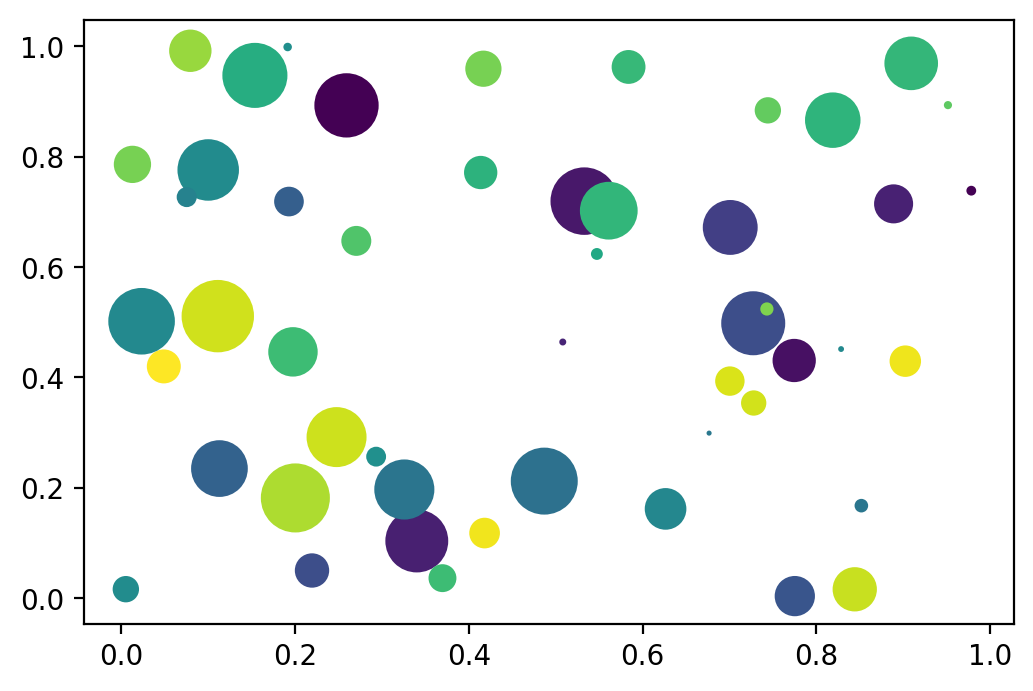

In [8]:
N = 50

np.random.seed(666)

x = np.random.rand(N) #x entre 0 e 1
y = np.random.rand(N) #y entre 0 e 1

colors = np.random.rand(N)

radii = np.random.rand(N)

area = np.pi * (15 * radii) ** 2  #Multiplico o raio por 15, pra ficar mais visível.

fig, ax = plt.subplots()

plt.rcParams["figure.dpi"] = 150

ax.scatter(x, y, s=area, c=colors, alpha=1) #s dá o size da canetinha

plt.show()

### Problema 1 (f)

In [9]:
N = 50

x, y = np.random.rand(N), np.random.rand(N)

inner = x @ y #= <x, y>

norm_x, norm_y = np.linalg.norm(x), np.linalg.norm(y) #euclidean norm

print(f"O produto interno é {inner}. Norma de x é {norm_x}, norma de y é {norm_y}.")

O produto interno é 14.194072478757048. Norma de x é 4.347822160201321, norma de y é 4.303759539671497.


### Problema 2 (a)

In [10]:
def bisect(func, a, b, eps=1e-20, maxiter=100):
    
    i = 0
    
    while i < maxiter:
        
        i = i + 1
        
        c = (a + b) / 2
        
        if (func(c) == 0) or ((b-a)/2 <= eps):
             
            return c
        
        elif (np.sign(func(a)) == np.sign(func(c))):
            
            a = c
            
        else:
            
            b = c
    
    return c

### Problema 2 (b)

Note que para computar a raiz cúbica de $x_0$, basta procurar no intervalo $[-x_0, x_0]$ se $|x| \geq 1$ e $[-x_0-1, x_0+1]$ caso contrário.

In [11]:
8 - (bisect(lambda x: x ** 3 - 8, -8, 8) ** 3)

0.0

In [12]:
8 - bisect(lambda x: x ** 3 - 8, -8, 8) ** 3

0.0

In [13]:
27 - bisect(lambda x: x ** 3 - 27, -27, 27) ** 3

0.0

In [14]:
64 - bisect(lambda x: x ** 3 - 64, -64, 64) ** 3

0.0

In [15]:
103823 - (bisect(lambda x: x ** 3 - 103823, -103823, 103823) ** 3)

0.0

**Bônus: basta tomar uma margem de tolerância menor pro intervalo quando tivermos números muito grandes.**

In [16]:
bisect(lambda x: x ** 3 - 1038212345634123, -1038212345634123, 1038212345634123, maxiter=9000)

101257.85648561254

![alt text](im.png "Title")

**No entanto, o erro de aproximação atrapalha:**

In [17]:
1038212345634123 - (bisect(lambda x: x ** 3 - 1038212345634123, -1038212345634123, 1038212345634123, maxiter=9000) ** 3)

-0.25

**USE A FUNÇÃO `round()`**

In [18]:
1038212345634123 - round((bisect(lambda x: x ** 3 - 1038212345634123, -1038212345634123, 1038212345634123, maxiter=9000) ** 3))

0

### Problema 2 (c)

Lembre-se: o método da bissecção procura pontos em $(0, 1)$, por isso vamos verificar os *edge cases* $x_0 = 0$ e $x_0 = 1$ separadamente.

In [19]:
def fixed_point_unit_interval(func):
    
    if func(0) == 0:
        
        return 0
    
    elif func(1) == 1:
        
        return 1
    
    else:
        
        return bisect(lambda x: func(x) - x, 0, 1)

In [20]:
fixed_point_unit_interval(lambda x: np.sin(x))

0

In [21]:
fixed_point_unit_interval(lambda x: np.cos(x))

0.7390851332151607

In [22]:
fixed_point_unit_interval(lambda x: 1 / (1 + x))

0.6180339887498948

A relação $\exp: [0, 1] \to [0, 1]$ **não é função!**; basta notarmos que $x = 0.5 \in [0, 1]$, mas que não existe $y \in [0, 1]$ com $y = exp(x)$. Este exemplo serve para ilustrar o seguinte princípio: **não saia aplicando funções implementadas sem pensar se faz sentido aplicá-las.**

In [23]:
fixed_point_unit_interval(lambda x: x ** 2)

0

### Problema 2 (d)

**Demonstração (do Teorema do Ponto Fixo de Brouwer, *for babies*).** Defina $g: [0, 1] \to [0, 1]$ pondo $g(x) = f(x) - x$. Então $g(0) = f(0) - 0 \geq 0$ e $g(1) = f(1) - 1 \leq 0$. Se $g(0) = 0$ ou $g(1) = 1$, o resultado é óbvio. Do contrário, se $g(0) > 0$ e $g(1) < 0$, a continuidade de $g$ e o Teorema do Valor Intermediário nos asseguram de que existe $x^{\star} \in (0, 1)$ com $g(x^{\star}) = 0$, ou seja, com $f(x^{\star}) = x^{\star}$, e o resultado segue. 

### Problema 2 (e)

In [24]:
def guessing_game(a, b, maxiter=20):
    
    print(f"Escolha um número inteiro entre {a} e {b}.")
    
    n = int(input())
    
    i = 0
    
    while i < maxiter:
        
        i = i + 1
        
        c = (a + b) / 2
        
        print(f"Seu número é {round(c)}? Responda S pra sim, B se errei pra baixo, C se errei pra cima.")
        
        R = input()
        
        if R == "S": #f(c) == 0
            
            return f"Então eu ganhei (após {i} etapas)!"
        
        if R == "B": #if np.sign(f(a)) == np.sing(f(c))
            
            a = c
            
        else:
            
            b = c
            
    return f"Seu número era {c}. Perdi." #string f(ormatada) {x}, x eh uma variavel
            

In [25]:
guessing_game(0, 100)

Escolha um número inteiro entre 0 e 100.
19
Seu número é 50? Responda S pra sim, B se errei pra baixo, C se errei pra cima.
C
Seu número é 25? Responda S pra sim, B se errei pra baixo, C se errei pra cima.
C
Seu número é 12? Responda S pra sim, B se errei pra baixo, C se errei pra cima.
B
Seu número é 19? Responda S pra sim, B se errei pra baixo, C se errei pra cima.
S


'Então eu ganhei (após 4 etapas)!'